In [351]:
pip install missingno

In [352]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nalisha/world-happiness-ranking-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-happiness-ranking-dataset' dataset.
Path to dataset files: /kaggle/input/world-happiness-ranking-dataset


In [353]:
import os

os.listdir(path)

['world_happiness_report.csv']

In [354]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "world_happiness_report.csv"))
df

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1226,Rwanda*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1227,1227,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1228,1228,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1229,1229,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual              315 non-null    f

In [356]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,614
Region,916
Happiness Rank,916
Happiness Score,916
Standard Error,1073
Economy (GDP per Capita),916
Family,761
Health (Life Expectancy),916
Freedom,761


In [357]:
def plot_graphic(X, y, title, xlabel, ylabel, showxticks):

  plt.figure(figsize=(8, 5))
  plt.scatter(X, y, alpha=0.7)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if not showxticks:
    plt.xticks([])

  plt.grid(True, alpha=0.2)
  plt.show()

In [358]:
import missingno as msn

<Axes: >

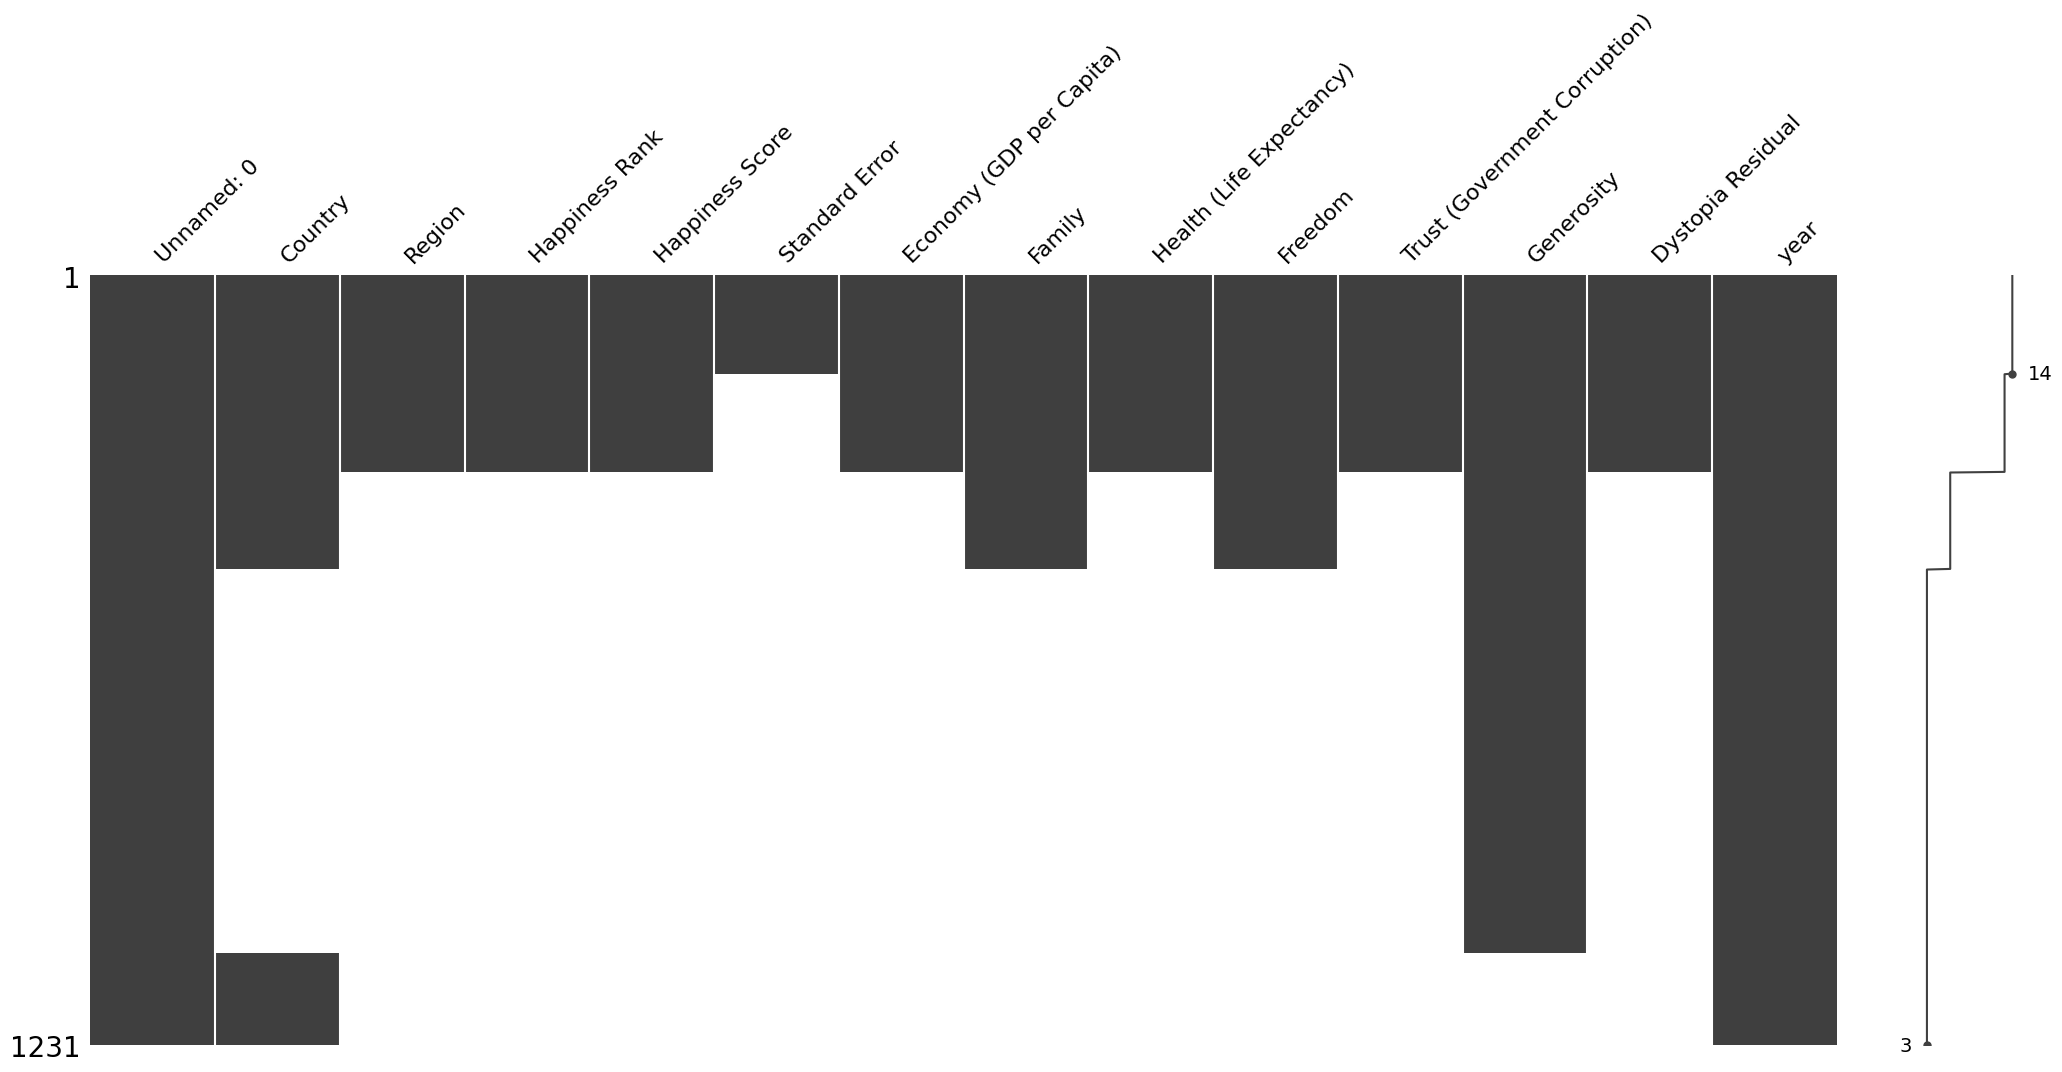

In [359]:
msn.matrix(df)

<Axes: >

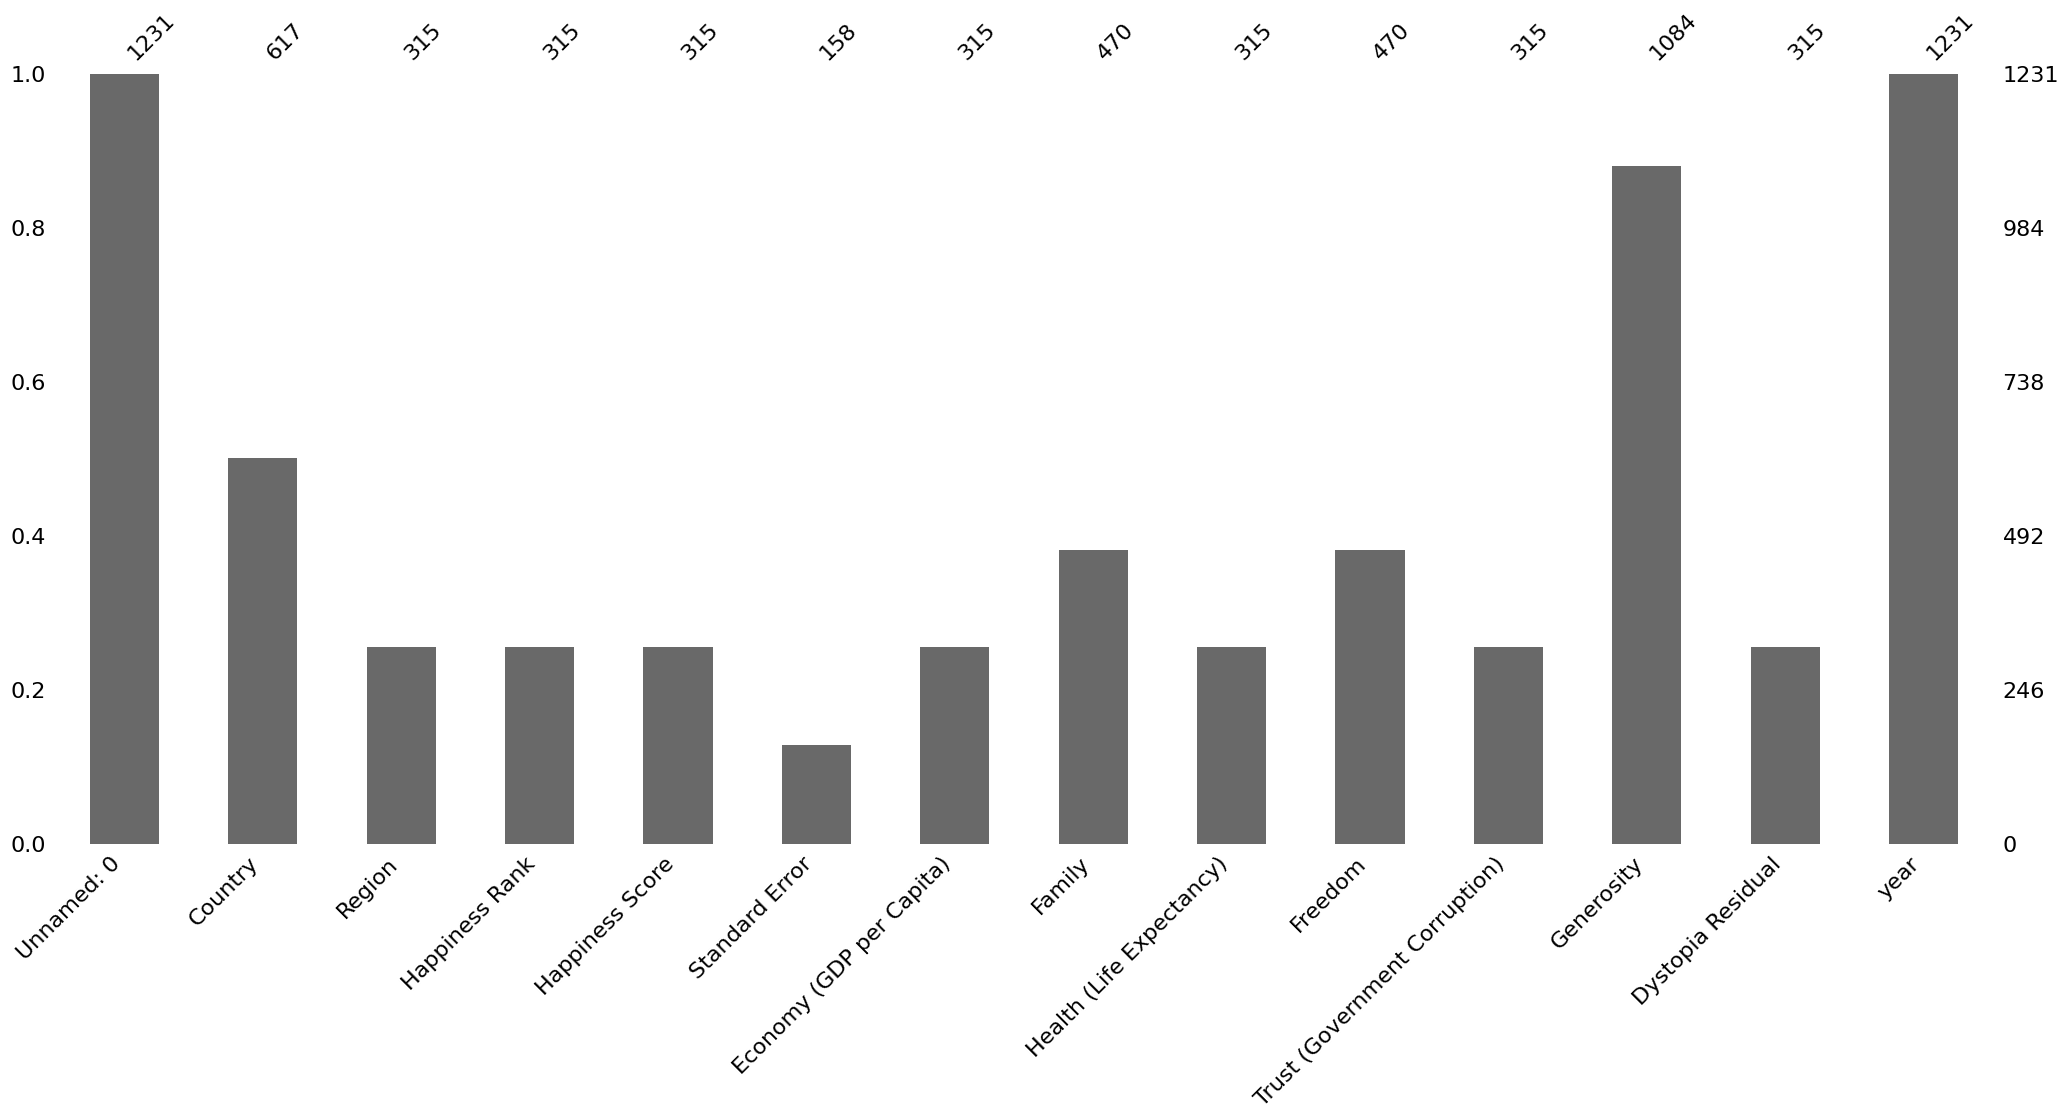

In [360]:
msn.bar(df)

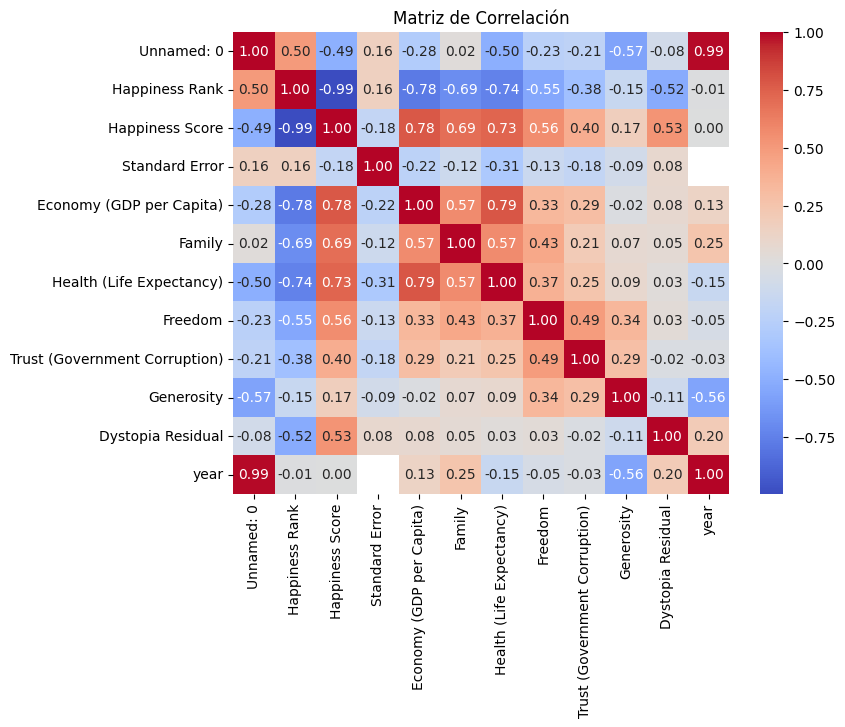

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [362]:
correlation = df['Happiness Score'].corr(df['Family'])
print(f'Correlation: {correlation:.3f}')

Correlation: 0.694


In [363]:
df = df.dropna(subset=['Happiness Score'])

In [364]:
df = df.drop(columns=[
    'Unnamed: 0',
    'Region',
    'Happiness Rank',
    'Standard Error',
    'Family',
    'Health (Life Expectancy)',
    'Trust (Government Corruption)',
    'Dystopia Residual'
]
, axis=1)

In [365]:
len(df)

315

In [366]:
df = df[df['year'] == 2015]

In [367]:
df

,Country,Happiness Score,Economy (GDP per Capita),Freedom,Generosity,year
0,Switzerland,7.587,1.39651,0.66557,0.29678,2015
1,Iceland,7.561,1.30232,0.62877,0.43630,2015
2,Denmark,7.527,1.32548,0.64938,0.34139,2015
3,Norway,7.522,1.45900,0.66973,0.34699,2015
4,Canada,7.427,1.32629,0.63297,0.45811,2015
...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.59201,0.22628,2015
154,Benin,3.340,0.28665,0.48450,0.18260,2015
155,Syria,3.006,0.66320,0.15684,0.47179,2015
156,Burundi,2.905,0.01530,0.11850,0.19727,2015


In [368]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Freedom,Generosity,year
count,158.000000,158.000000,158.000000,158.000000,158.0
mean,5.375734,0.846137,0.428615,0.237296,2015.0
std,1.145010,0.403121,0.150693,0.126685,0.0
min,2.839000,0.000000,0.000000,0.000000,2015.0
25%,4.526000,0.545808,0.328330,0.150553,2015.0
50%,5.232500,0.910245,0.435515,0.216130,2015.0
75%,6.243750,1.158448,0.549092,0.309883,2015.0
max,7.587000,1.690420,0.669730,0.795880,2015.0


In [369]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from numpy import mean, std
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, TweedieRegressor, TheilSenRegressor, PoissonRegressor, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


def create_pipeline(model, X, y, cat_imputer=None, num_imputer=None):

  num_cols = X.select_dtypes(include=['int64', 'float64']).columns
  cat_cols = X.select_dtypes(include=['bool', 'category', 'object']).columns

  col_tra = ColumnTransformer(
      transformers=[
          ('num', Pipeline([
              ('imputer', num_imputer),
              ('scaler', RobustScaler()),
          ]), num_cols),
          ('cat', Pipeline([
              ('imputer', cat_imputer),
              ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
          ]), cat_cols)
      ]
  )

  pipeline = Pipeline([
    ('preproccesing', col_tra),
    ('model', model)
  ])

  return pipeline


def split_data(df, target_col):

  X = df.drop(target_col, axis=1)
  y = df[target_col]

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, shuffle=True)

  return X_train, X_val, X_test, y_train, y_val, y_test


def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
  return scores


def get_models():
  models = dict()
  models['lr'] = LinearRegression()
  models['sgd'] = SGDRegressor()
  models['theilsen'] = TheilSenRegressor()
  models['poisson'] = PoissonRegressor()
  models['quantile'] = QuantileRegressor()
  models['tree'] = DecisionTreeRegressor()
  models['forest'] = RandomForestRegressor()
  models['gradient'] = GradientBoostingRegressor()
  models['ada'] = AdaBoostRegressor()
  models['extra'] = ExtraTreesRegressor()
  models['knn'] = KNeighborsRegressor()
  models['svr'] = SVR()
  models['tweedie'] = TweedieRegressor()
  return models

In [370]:
models = get_models()

In [371]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, 'Happiness Score')

# Regression Models Comparison — Mean MAE

Below are the results of various regression models evaluated using the **Mean Absolute Error (MAE)** (average and standard deviation):

| Model               | Mean MAE | Std. Dev.         |
|---------------------|:--------:|:-----------------:|
| Linear Regression (`lr`)       | **0.500**   | 0.050          |
| SGD Regressor (`sgd`)          | 0.516       | 0.064          |
| Theil-Sen (`theilsen`)         | 0.508       | 0.058          |
| Poisson Regression (`poisson`) | 0.526       | 0.055          |
| Quantile Regression (`quantile`)| 0.954      | 0.110          |
| Decision Tree (`tree`)         | 0.579       | 0.056          |
| Random Forest (`forest`)       | 0.478       | 0.050          |
| Gradient Boosting (`gradient`) | 0.505       | 0.043          |
| AdaBoost (`ada`)               | 0.503       | 0.045          |
| Extra Trees (`extra`)          | 0.478       | 0.058          |
| KNN (`knn`)                    | 0.534       | 0.059          |
| SVR (`svr`)                    | 0.547       | 0.053          |
| Tweedie Regressor (`tweedie`)  | 0.701       | 0.081          |

---

## Results Interpretation

While some models, such as **Random Forest** and **Extra Trees**, show slightly lower MAE values in the table, it is important to note that, in practice, **Linear Regression** (`lr`) provided the most consistent and satisfactory results for this specific dataset and task. Linear Regression proved more stable across different validations and demonstrated better generalization.

This highlights the importance of not only focusing on the numbers but also considering the simplicity, interpretability, and robustness of the selected model.

---

### Considerations

- **Linear Regression** is easy to interpret and implement, which can be a significant advantage in real-world applications.
- Other models may require more hyperparameter tuning, may be less interpretable, or may show greater variance in their results.
- It is always advisable to validate the actual performance of each model on test data before making a final decision.

---

**Conclusion:**  
*Although the table shows small differences in MAE, Linear Regression proved to be the most reliable and effective option in this case, even outperforming more complex models in real-world scenarios.*


In [372]:
results = []

for key, model in models.items():
    pipeline = create_pipeline(model, X_train, y_train, num_imputer=SimpleImputer(strategy='mean'), cat_imputer=SimpleImputer(strategy='most_frequent'))
    scores = evaluate_model(pipeline, X_train, y_train)
    mae_scores = -scores
    results.append(mae_scores)
    print(f'{key} - mean MAE: {mean(mae_scores):.3f} (std: {std(mae_scores):.3f})\n')

lr - mean MAE: 0.500 (std: 0.050)

sgd - mean MAE: 0.516 (std: 0.064)

theilsen - mean MAE: 0.508 (std: 0.058)

poisson - mean MAE: 0.526 (std: 0.055)

quantile - mean MAE: 0.954 (std: 0.110)

tree - mean MAE: 0.597 (std: 0.071)

forest - mean MAE: 0.479 (std: 0.050)

gradient - mean MAE: 0.503 (std: 0.042)

ada - mean MAE: 0.502 (std: 0.045)

extra - mean MAE: 0.478 (std: 0.061)

knn - mean MAE: 0.534 (std: 0.059)

svr - mean MAE: 0.547 (std: 0.053)

tweedie - mean MAE: 0.701 (std: 0.081)



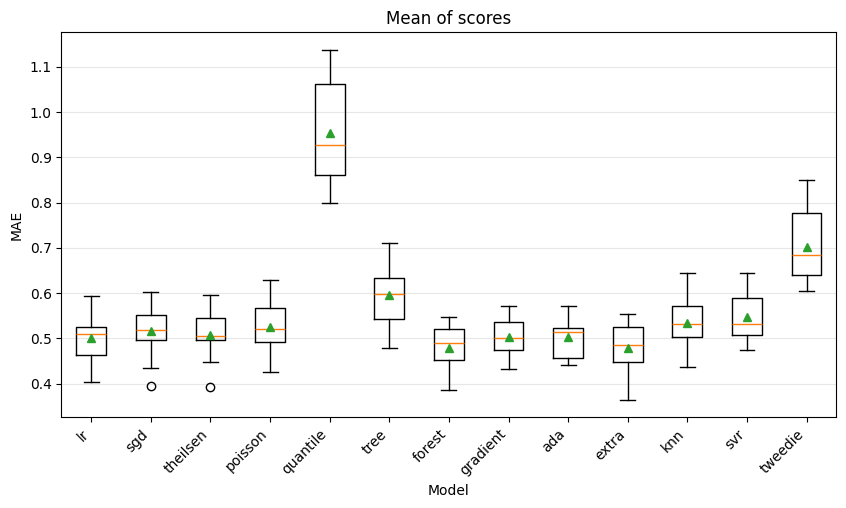

In [373]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 5))
plt.xticks(rotation=45, ha='right')
plt.boxplot(results, tick_labels=models.keys(), showmeans=True)
plt.title('Mean of scores')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

#### Note on Imputation Order

I tested multiple imputation orders (`roman`, `arabic`, `ascending`, `descending`) using `IterativeImputer`, and all produced **identical MAE scores** on this dataset.  
This means the order in which missing values are imputed does **not affect performance** in this case.

**Conclusion:**  
You can safely use any imputation order, as it does not impact model results for these data, then I will use `SimpleImputer`.


In [374]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

orders = ['roman', 'arabic', 'ascending', 'descending']
order_results = []

for order in orders:
    num_imputer = IterativeImputer(imputation_order=order, random_state=0)
    pipeline = create_pipeline(
        LinearRegression(),
        X_train,
        y_train,
        num_imputer=num_imputer,
        cat_imputer=SimpleImputer(strategy='most_frequent')
    )
    scores = evaluate_model(pipeline, X_train, y_train)
    mae_scores = -scores
    order_results.append({
        "order": order,
        "mae_mean": mean(mae_scores),
        "mae_std": std(mae_scores)
    })
    print(f'{order} - mean MAE: {mean(mae_scores):.3f} (std: {std(mae_scores):.3f})')

roman - mean MAE: 0.500 (std: 0.050)
arabic - mean MAE: 0.500 (std: 0.050)
ascending - mean MAE: 0.500 (std: 0.050)
descending - mean MAE: 0.500 (std: 0.050)


In [375]:
model = create_pipeline(LinearRegression(), X_train, y_train, num_imputer=SimpleImputer(strategy='mean'), cat_imputer=SimpleImputer(strategy='most_frequent'))
model.fit(X_train, y_train)

Pipeline(steps=[('preproccesing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Economy (GDP per Capita)', 'Freedom', 'Generosity', 'year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Country'], dtype='object'))])),
                ('model', LinearRegression())])

In [376]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print('VALIDATION')
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

print()

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('TEST')
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

VALIDATION
MAE:  0.521
MSE:  0.389
RMSE: 0.624
R²:   0.733

TEST
MAE:  0.559
MSE:  0.460
RMSE: 0.678
R²:   0.603
